In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Indian_housing_Pune_data.csv")

In [3]:
df.head()

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status
0,2 BHK Apartment,906 sq ft,Lohegaon,Pune,18.605820,73.912407,12000,INR,2.0,NaN,NaN,NaN,Posted 3 years ago,A spacious 2 bhk multistorey apartment is avai...,No Deposit,Unfurnished
1,1 BHK Apartment,650 sq ft,Anand Nagar,Pune,18.474377,73.820549,11000,INR,1.0,NaN,NaN,NaN,Posted 2 years ago,It has a built-up area of 650 sqft and is avai...,No Deposit,Semi-Furnished
2,1 RK Studio Apartment,350 sq ft,Wagholi,Pune,18.580336,73.980507,4500,INR,1.0,NaN,NaN,NaN,Posted 2 years ago,This spacious 1 rk independent house is availa...,No Deposit,Unfurnished
3,3 BHK Apartment,"1,500 sq ft",Sangamvadi,Pune,18.541786,73.882454,35000,INR,2.0,NaN,NaN,NaN,Posted 3 years ago,"Furnishings include 1 tv, 1 refrigerator, 1 so...",No Deposit,Furnished
4,5 BHK Independent House,"5,000 sq ft",Wadgaon Sheri,Pune,18.560164,73.924927,110000,INR,5.0,NaN,NaN,NaN,Posted 3 years ago,Itâs a 5 bhk independent house situated in W...,No Deposit,Unfurnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   house_type        3910 non-null   object 
 1   house_size        3910 non-null   object 
 2   location          3910 non-null   object 
 3   city              3910 non-null   object 
 4   latitude          3910 non-null   float64
 5   longitude         3910 non-null   float64
 6   price             3910 non-null   int64  
 7   currency          3910 non-null   object 
 8   numBathrooms      3893 non-null   float64
 9   numBalconies      1821 non-null   float64
 10  isNegotiable      526 non-null    object 
 11  priceSqFt         0 non-null      float64
 12  verificationDate  3910 non-null   object 
 13  description       3442 non-null   object 
 14  SecurityDeposit   3910 non-null   object 
 15  Status            3910 non-null   object 
dtypes: float64(5), int64(1), object(10)
memory

In [5]:
df.drop(columns ='priceSqFt',inplace=True)

In [6]:
df.describe()

,latitude,longitude,price,numBathrooms,numBalconies
count,3910.000000,3910.000000,3910.000000,3893.000000,1821.000000
mean,18.574965,73.806618,22085.651407,1.945543,1.579352
std,0.318927,1.993674,18697.317973,0.733933,0.631492
min,18.150000,18.497896,1500.000000,1.000000,1.000000
25%,18.532398,73.790102,13500.000000,1.000000,1.000000
50%,18.575352,73.895088,18000.000000,2.000000,2.000000
75%,18.594040,73.935503,25000.000000,2.000000,2.000000
max,31.106586,83.992943,425000.000000,7.000000,4.000000


In [7]:
df.shape

(3910, 15)

In [8]:
na_features = []
for feature in df.columns:
    if df[feature].isnull().sum()>0:
        print(f'{feature} = {df[feature].isnull().sum()/len(df)*100} %' )
        na_features.append(feature)

numBathrooms = 0.43478260869565216 %
numBalconies = 53.427109974424546 %
isNegotiable = 86.54731457800511 %
description = 11.9693094629156 %


In [9]:
num_features = []
for feature in df.columns:
    if df[feature].dtype!='O':
        num_features.append(feature)

here we can see that we can drop columns priceSqft, latitiude, longitude as they are not affecting our dependent variable price

In [10]:
# df.drop(columns = ['longitude','latitude','priceSqFt','isNegotiable','numBalconies'],inplace=True)

In [11]:
df.shape

(3910, 15)

In [12]:
df.head()

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,verificationDate,description,SecurityDeposit,Status
0,2 BHK Apartment,906 sq ft,Lohegaon,Pune,18.605820,73.912407,12000,INR,2.0,NaN,NaN,Posted 3 years ago,A spacious 2 bhk multistorey apartment is avai...,No Deposit,Unfurnished
1,1 BHK Apartment,650 sq ft,Anand Nagar,Pune,18.474377,73.820549,11000,INR,1.0,NaN,NaN,Posted 2 years ago,It has a built-up area of 650 sqft and is avai...,No Deposit,Semi-Furnished
2,1 RK Studio Apartment,350 sq ft,Wagholi,Pune,18.580336,73.980507,4500,INR,1.0,NaN,NaN,Posted 2 years ago,This spacious 1 rk independent house is availa...,No Deposit,Unfurnished
3,3 BHK Apartment,"1,500 sq ft",Sangamvadi,Pune,18.541786,73.882454,35000,INR,2.0,NaN,NaN,Posted 3 years ago,"Furnishings include 1 tv, 1 refrigerator, 1 so...",No Deposit,Furnished
4,5 BHK Independent House,"5,000 sq ft",Wadgaon Sheri,Pune,18.560164,73.924927,110000,INR,5.0,NaN,NaN,Posted 3 years ago,Itâs a 5 bhk independent house situated in W...,No Deposit,Unfurnished


now we will do analysis for each 

here we can see that we can drop city and currency

In [13]:
df.drop(columns = ['city','currency'],inplace=True)

In [14]:
df.shape

(3910, 13)

In [15]:
df['SecurityDeposit'].value_counts()

SecurityDeposit
No Deposit    1463
 50,000        393
 30,000        286
 60,000        279
 40,000        277
              ... 
 7,00,000        1
 7,50,000        1
 74,000          1
 28,000          1
 38,000          1
Name: count, Length: 87, dtype: int64

In [16]:
df['SecurityDeposit'].unique()

array(['No Deposit', ' 1,20,000', ' 90,000', ' 1,00,000', ' 2,00,000',
       ' 80,000', ' 30,000', ' 50,000', ' 28,000', ' 70,000', ' 60,000',
       ' 4,00,000', ' 25,000', ' 15,00,000', ' 1,50,000', ' 40,000',
       ' 75,000', ' 65,000', ' 35,000', ' 1,10,000', ' 66,000', ' 36,000',
       ' 39,000', ' 44,000', ' 32,000', ' 54,000', ' 45,000', ' 20,000',
       ' 1,30,000', ' 55,000', ' 1,25,000', ' 6,00,000', ' 3,000',
       ' 3,00,000', ' 26,000', ' 27,000', ' 48,000', ' 24,000', ' 74,000',
       ' 63,000', ' 33,000', ' 51,000', ' 7,50,000', ' 18,000', ' 42,000',
       ' 19,000', ' 5,00,000', ' 72,000', ' 78,000', ' 15,000',
       ' 7,00,000', ' 95,000', ' 13,000', ' 10,000', ' 67,000', ' 12,000',
       ' 5,000', ' 4,80,000', ' 11,000', ' 9,000', ' 85,000', ' 93,000',
       ' 4,000', ' 68,000', ' 1,15,000', ' 56,000', ' 1,35,000', ' 7,000',
       ' 16,000', ' 2,500', ' 84,000', ' 2,50,000', ' 1,80,000',
       ' 2,10,000', ' 1,90,000', ' 2,40,000', ' 52,000', ' 8,000',
   

In [17]:
df['SecurityDeposit'] = df['SecurityDeposit'].replace('No Deposit', '0')
df['SecurityDeposit'] = df['SecurityDeposit'].str.replace(',', '').str.strip()

In [18]:
df['SecurityDeposit'] = df['SecurityDeposit'].astype('float')

In [19]:
df['house_size'] = df['house_size'].str.strip(" ").str.strip(" sq ft").str.replace(',', '').str.strip()

In [20]:
df['house_size'] = df['house_size'].astype('float')

In [21]:
num_features = []
for feature in df.columns:
    if df[feature].dtype!='O':
        num_features.append(feature)

In [22]:
cat_features = []
for feature in df.columns:
    if df[feature].dtype=='O' and feature not in ['city','currency']:
        cat_features.append(feature)
cat_features

['house_type',
 'location',
 'isNegotiable',
 'verificationDate',
 'description',
 'Status']

In [23]:
for feature in cat_features:
    print(f'{feature} and {len(df[feature].unique())}')

house_type and 22
location and 226
isNegotiable and 2
verificationDate and 47
description and 3032
Status and 3


In [24]:
df.head()

,house_type,house_size,location,latitude,longitude,price,numBathrooms,numBalconies,isNegotiable,verificationDate,description,SecurityDeposit,Status
0,2 BHK Apartment,906.0,Lohegaon,18.605820,73.912407,12000,2.0,NaN,NaN,Posted 3 years ago,A spacious 2 bhk multistorey apartment is avai...,0.0,Unfurnished
1,1 BHK Apartment,650.0,Anand Nagar,18.474377,73.820549,11000,1.0,NaN,NaN,Posted 2 years ago,It has a built-up area of 650 sqft and is avai...,0.0,Semi-Furnished
2,1 RK Studio Apartment,350.0,Wagholi,18.580336,73.980507,4500,1.0,NaN,NaN,Posted 2 years ago,This spacious 1 rk independent house is availa...,0.0,Unfurnished
3,3 BHK Apartment,1500.0,Sangamvadi,18.541786,73.882454,35000,2.0,NaN,NaN,Posted 3 years ago,"Furnishings include 1 tv, 1 refrigerator, 1 so...",0.0,Furnished
4,5 BHK Independent House,5000.0,Wadgaon Sheri,18.560164,73.924927,110000,5.0,NaN,NaN,Posted 3 years ago,Itâs a 5 bhk independent house situated in W...,0.0,Unfurnished


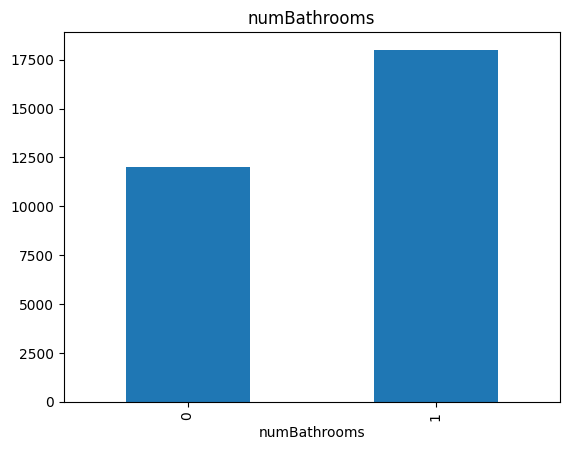

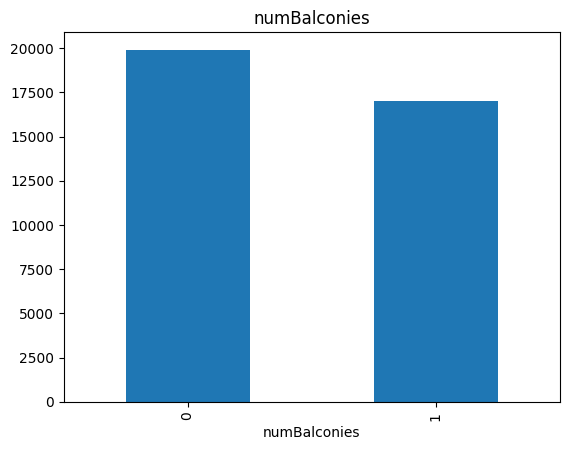

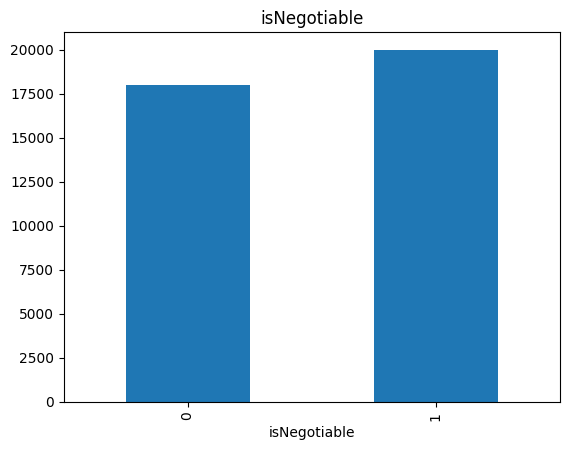

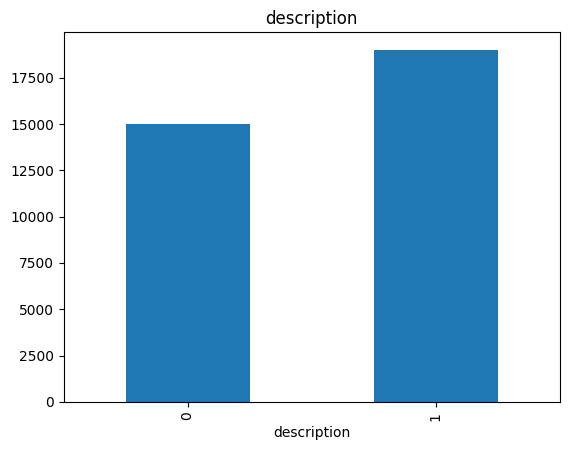

In [25]:
for feature in na_features:
    data = df.copy()
    data[feature] = np.where(df[feature].isnull(),0,1)

    data.groupby(feature)['price'].median().plot(kind='bar')
    plt.title(feature)
    plt.show()

In [26]:
df.head()

,house_type,house_size,location,latitude,longitude,price,numBathrooms,numBalconies,isNegotiable,verificationDate,description,SecurityDeposit,Status
0,2 BHK Apartment,906.0,Lohegaon,18.605820,73.912407,12000,2.0,NaN,NaN,Posted 3 years ago,A spacious 2 bhk multistorey apartment is avai...,0.0,Unfurnished
1,1 BHK Apartment,650.0,Anand Nagar,18.474377,73.820549,11000,1.0,NaN,NaN,Posted 2 years ago,It has a built-up area of 650 sqft and is avai...,0.0,Semi-Furnished
2,1 RK Studio Apartment,350.0,Wagholi,18.580336,73.980507,4500,1.0,NaN,NaN,Posted 2 years ago,This spacious 1 rk independent house is availa...,0.0,Unfurnished
3,3 BHK Apartment,1500.0,Sangamvadi,18.541786,73.882454,35000,2.0,NaN,NaN,Posted 3 years ago,"Furnishings include 1 tv, 1 refrigerator, 1 so...",0.0,Furnished
4,5 BHK Independent House,5000.0,Wadgaon Sheri,18.560164,73.924927,110000,5.0,NaN,NaN,Posted 3 years ago,Itâs a 5 bhk independent house situated in W...,0.0,Unfurnished


In [27]:
dis_features = [feature for feature in num_features if len(df[feature].unique())<25]
dis_features

['numBathrooms', 'numBalconies']

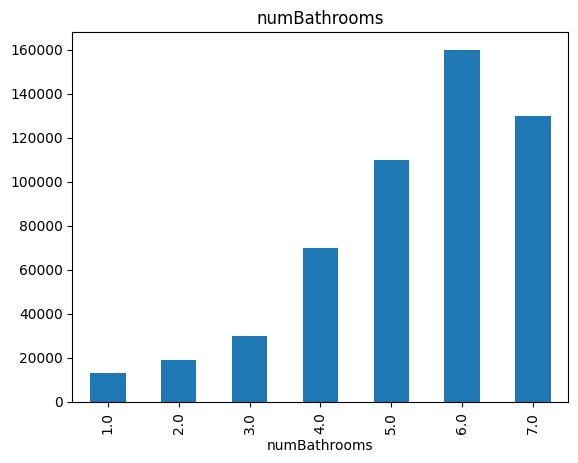

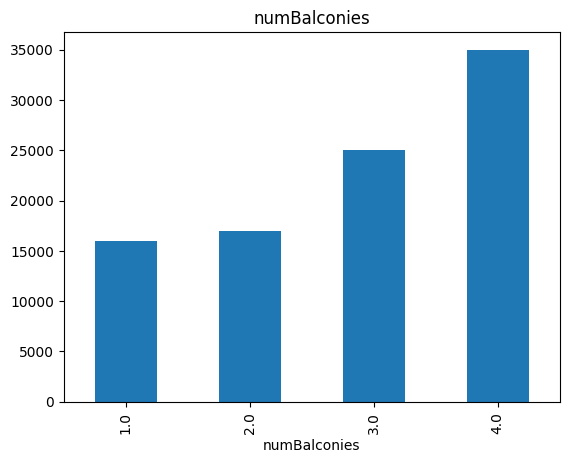

In [28]:
for feature in dis_features:
    data = df.copy()
    data.groupby(feature)['price'].median().plot(kind='bar')
    plt.title(feature)
    plt.show()

continuous

In [29]:
con_features = [feature for feature in num_features if feature not in dis_features]
con_features

['house_size', 'latitude', 'longitude', 'price', 'SecurityDeposit']

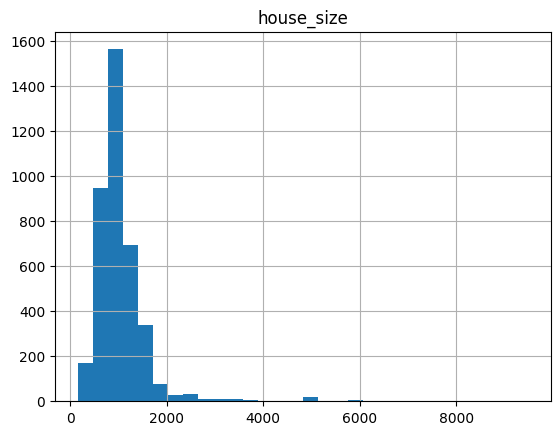

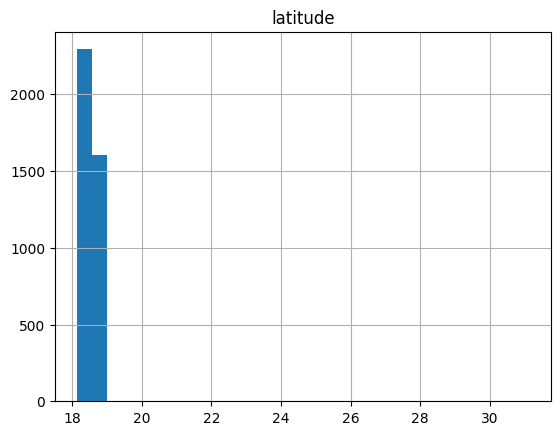

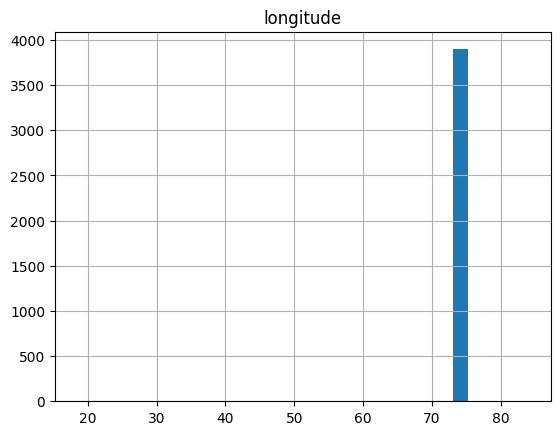

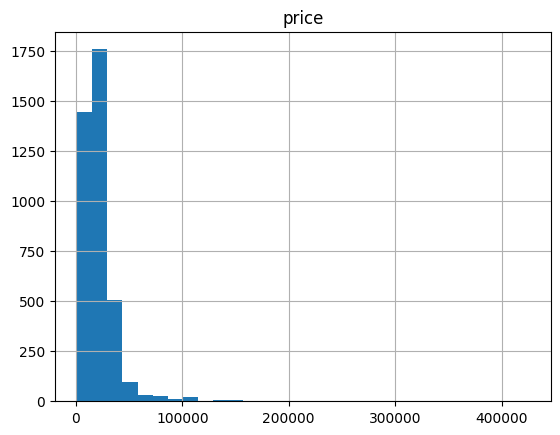

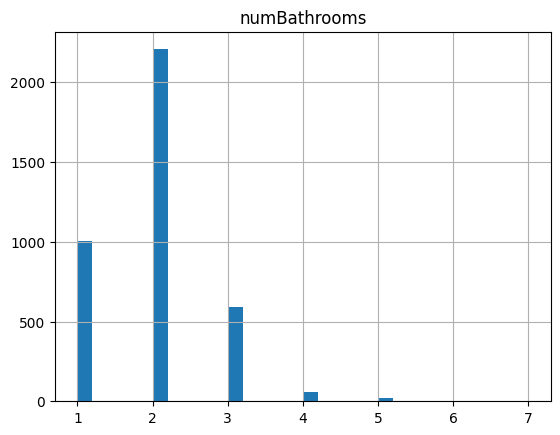

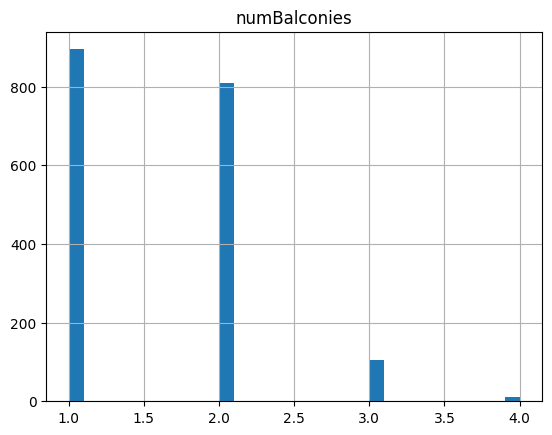

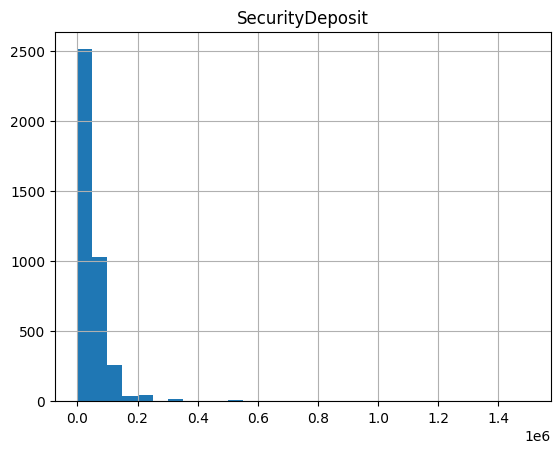

In [30]:
for feature in num_features:
    data = df.copy()
    data[feature].hist(bins=30)
    plt.title(feature)
    plt.show()

<Axes: xlabel='house_size', ylabel='Count'>

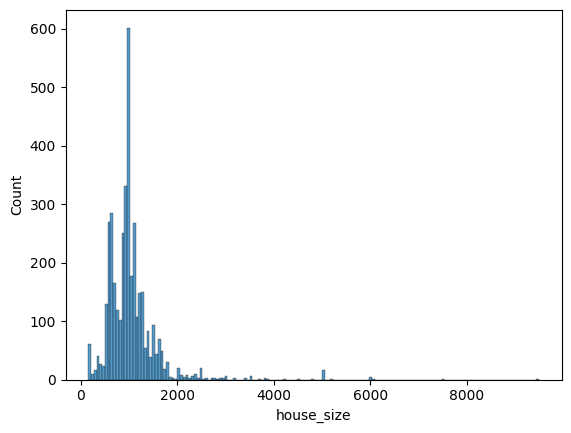

In [31]:
sns.histplot(df['house_size'])

<Axes: xlabel='price', ylabel='Count'>

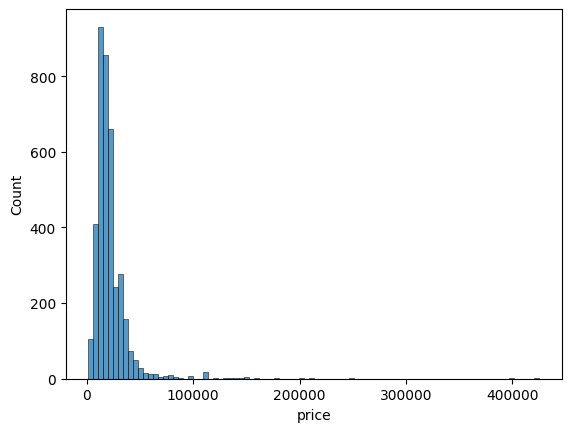

In [32]:
sns.histplot(df['price'],bins=90)

<Axes: xlabel='SecurityDeposit', ylabel='Count'>

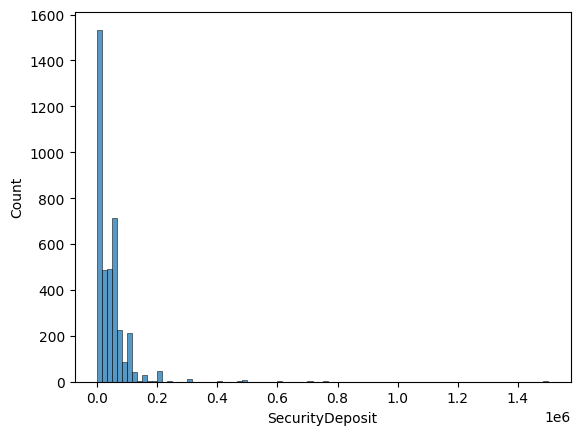

In [33]:
sns.histplot(df['SecurityDeposit'],bins=90)

In [34]:
df.head()

,house_type,house_size,location,latitude,longitude,price,numBathrooms,numBalconies,isNegotiable,verificationDate,description,SecurityDeposit,Status
0,2 BHK Apartment,906.0,Lohegaon,18.605820,73.912407,12000,2.0,NaN,NaN,Posted 3 years ago,A spacious 2 bhk multistorey apartment is avai...,0.0,Unfurnished
1,1 BHK Apartment,650.0,Anand Nagar,18.474377,73.820549,11000,1.0,NaN,NaN,Posted 2 years ago,It has a built-up area of 650 sqft and is avai...,0.0,Semi-Furnished
2,1 RK Studio Apartment,350.0,Wagholi,18.580336,73.980507,4500,1.0,NaN,NaN,Posted 2 years ago,This spacious 1 rk independent house is availa...,0.0,Unfurnished
3,3 BHK Apartment,1500.0,Sangamvadi,18.541786,73.882454,35000,2.0,NaN,NaN,Posted 3 years ago,"Furnishings include 1 tv, 1 refrigerator, 1 so...",0.0,Furnished
4,5 BHK Independent House,5000.0,Wadgaon Sheri,18.560164,73.924927,110000,5.0,NaN,NaN,Posted 3 years ago,Itâs a 5 bhk independent house situated in W...,0.0,Unfurnished


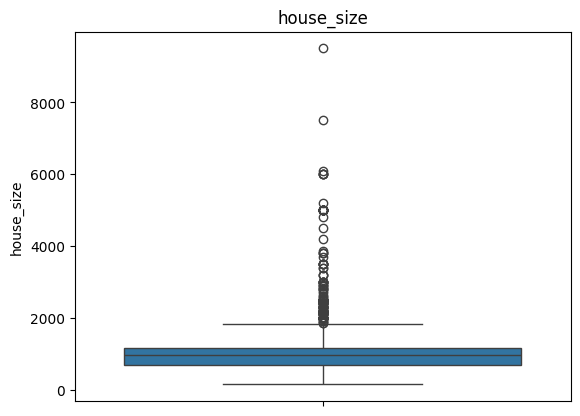

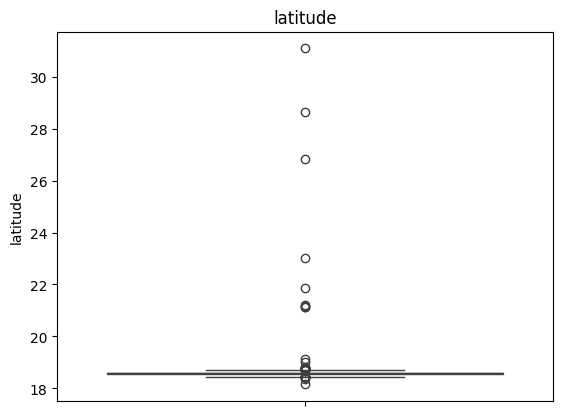

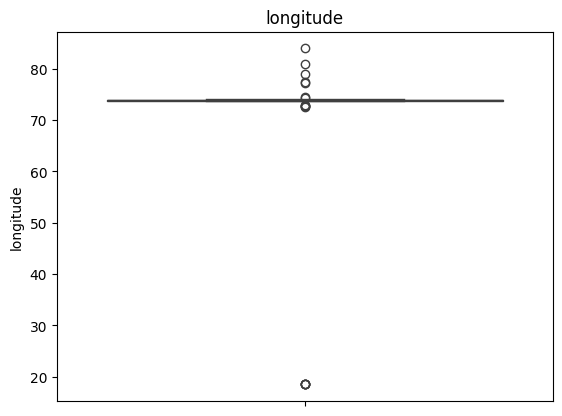

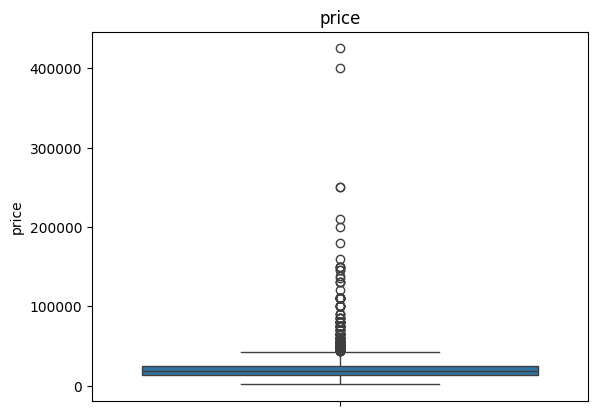

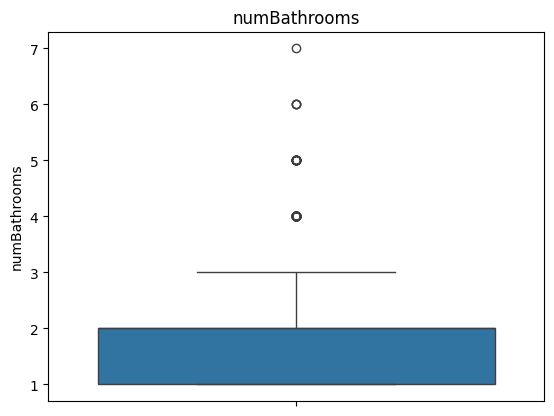

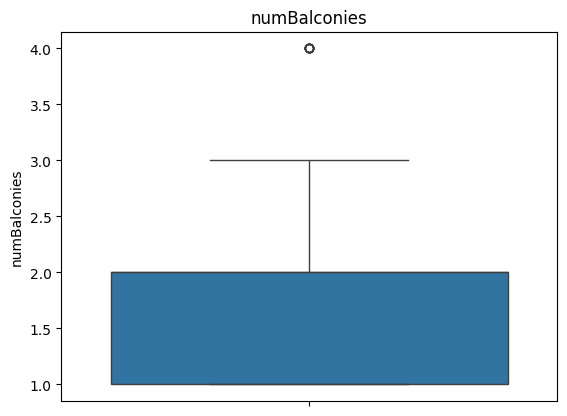

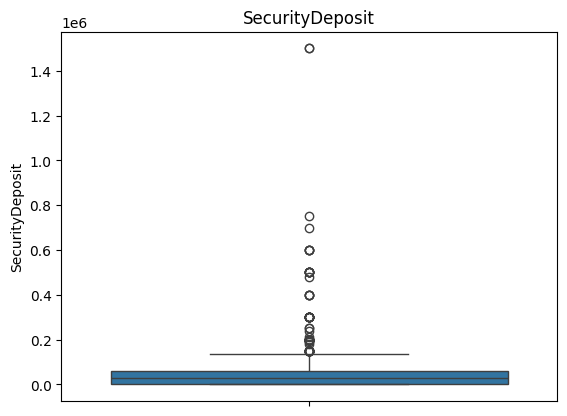

In [35]:
for feature in num_features:
    sns.boxplot(df[feature])
    plt.title(feature)
    plt.show()

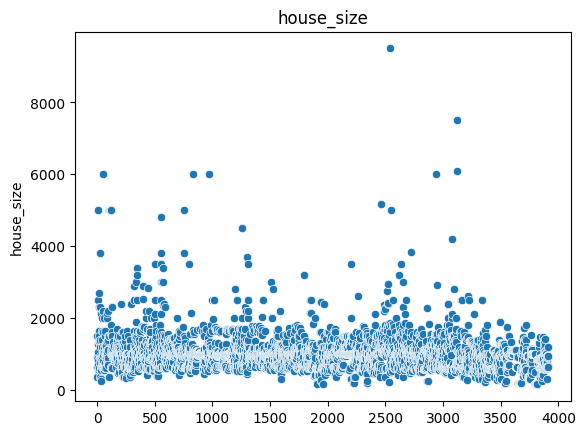

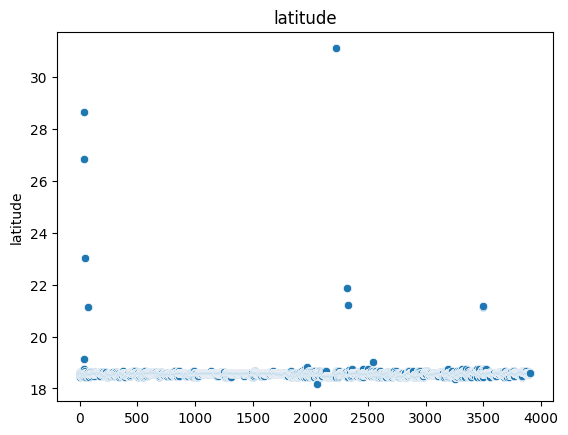

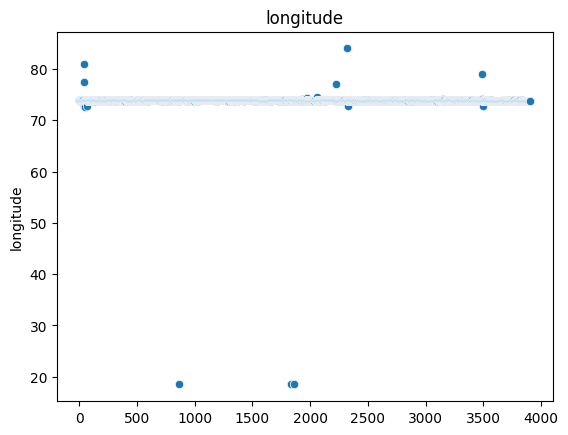

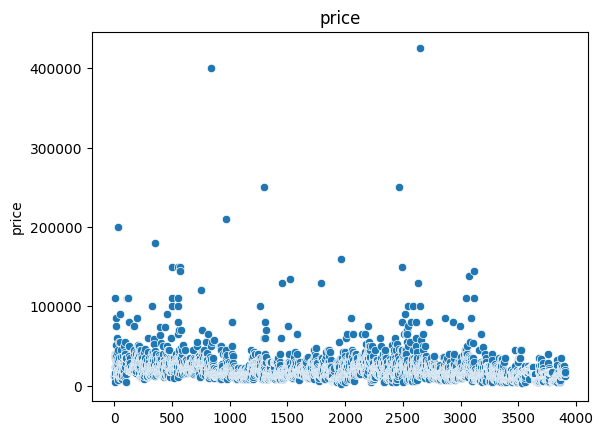

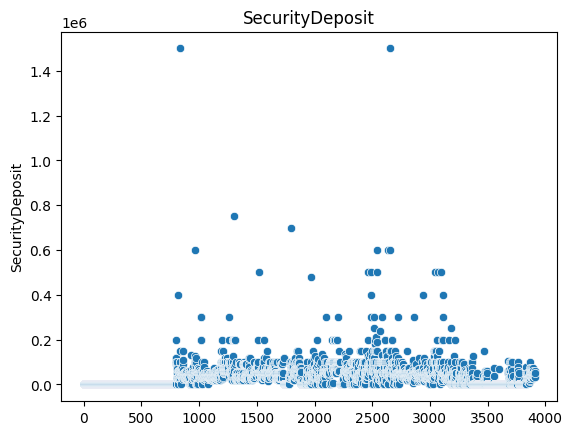

In [36]:
for feature in con_features:
    sns.scatterplot(df[feature])
    plt.title(feature)
    plt.show()

In [37]:
num_features

['house_size',
 'latitude',
 'longitude',
 'price',
 'numBathrooms',
 'numBalconies',
 'SecurityDeposit']

In [38]:
cat_features

['house_type',
 'location',
 'isNegotiable',
 'verificationDate',
 'description',
 'Status']

In [39]:
def handle_outliers(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Option 1: Remove outliers
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    # Option 2: Cap/Floor outliers
    df[column] = np.where(df[column] > upper_bound, upper_bound,
                          np.where(df[column] < lower_bound, lower_bound, df[column]))
    
    return df, df_no_outliers

# Handle outliers for each numerical feature
df_capped = df.copy()
df_no_outliers = df.copy()

for feature in num_features:
    df_capped, _ = handle_outliers(df_capped, feature)
    _, df_no_outliers = handle_outliers(df_no_outliers, feature)

# Print results
print("Data with capped outliers:")
print(df_capped)

print("\nData with outliers removed:")
print(df_no_outliers)


Data with capped outliers:
                    house_type  house_size         location   latitude  \
0             2 BHK Apartment        906.0         Lohegaon  18.605820   
1             1 BHK Apartment        650.0      Anand Nagar  18.474377   
2       1 RK Studio Apartment        350.0          Wagholi  18.580336   
3             3 BHK Apartment       1500.0       Sangamvadi  18.541786   
4     5 BHK Independent House       1842.5    Wadgaon Sheri  18.560164   
...                        ...         ...              ...        ...   
3905          1 BHK Apartment        655.0            Wakad  18.603699   
3906          2 BHK Apartment        920.0  Pimple Saudagar  18.594870   
3907          1 BHK Apartment        650.0  Pimple Saudagar  18.595701   
3908          2 BHK Apartment       1200.0  Pimple Saudagar  18.592476   
3909          2 BHK Apartment        933.0         Rahatani  18.600847   

      longitude    price  numBathrooms  numBalconies isNegotiable  \
0     73.912407

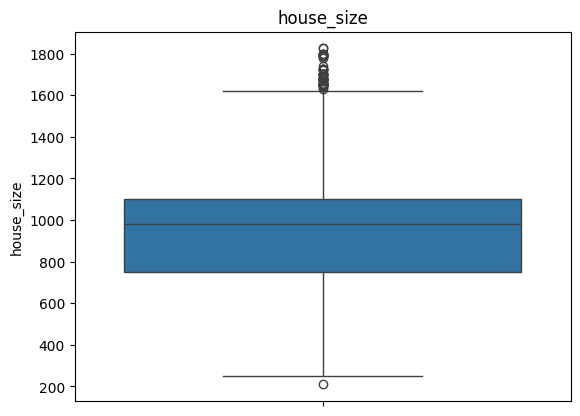

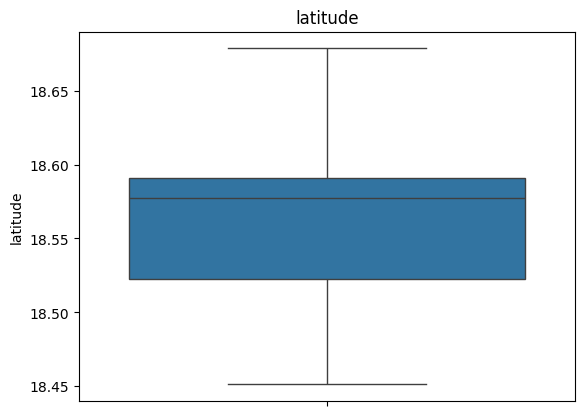

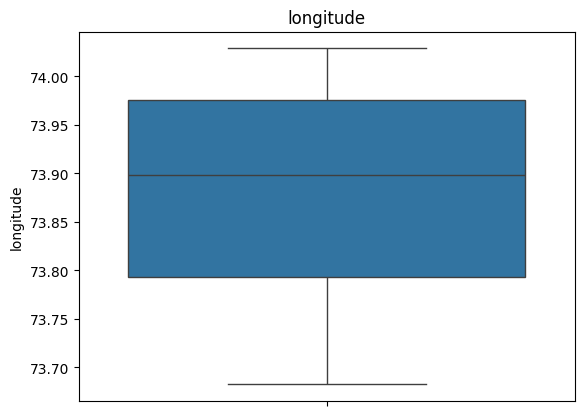

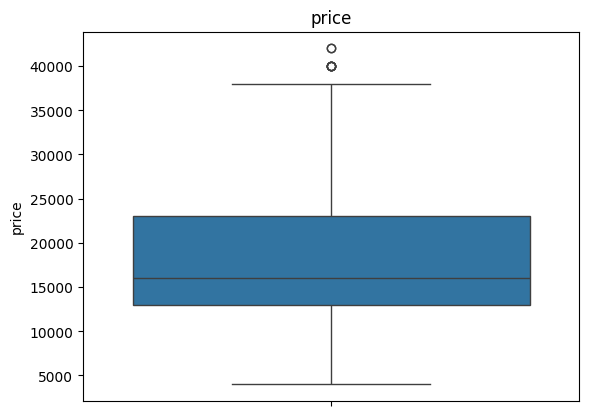

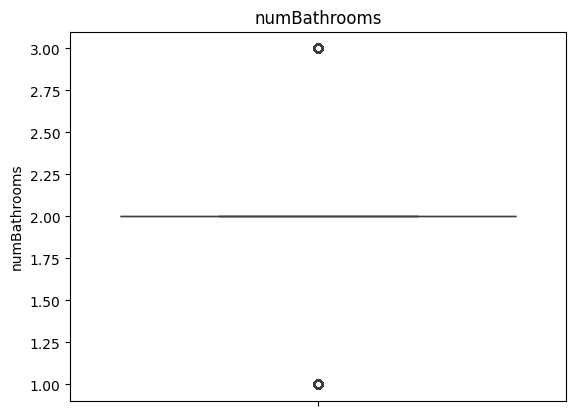

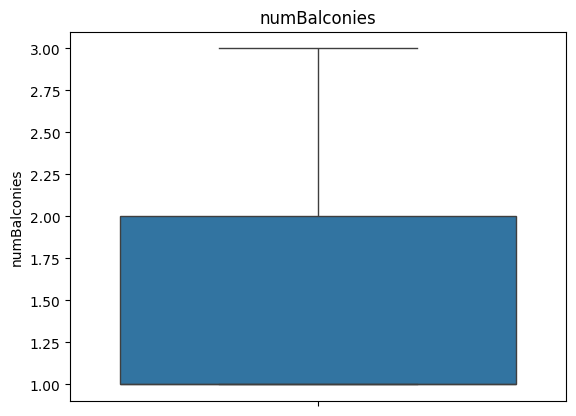

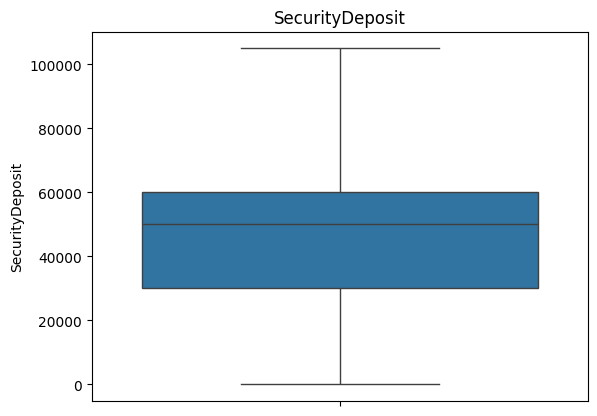

In [40]:
for feature in num_features:
    sns.boxplot(df_no_outliers[feature])
    plt.title(feature)
    plt.show()

In [41]:
df_no_outliers.shape

(1598, 13)

In [42]:
df_capped.shape

(3910, 13)

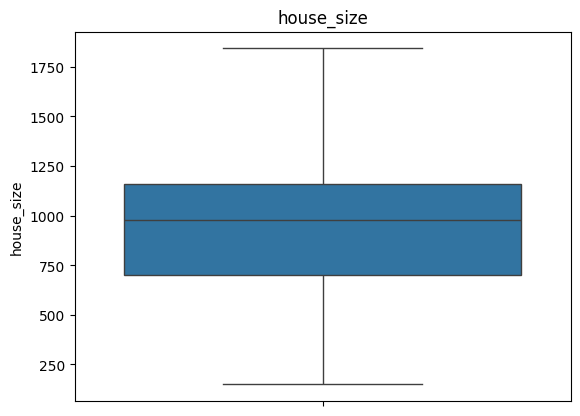

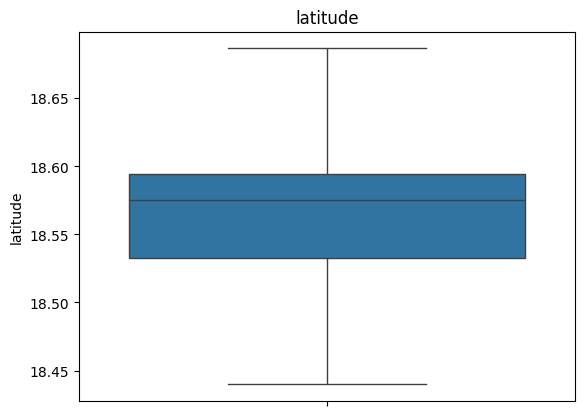

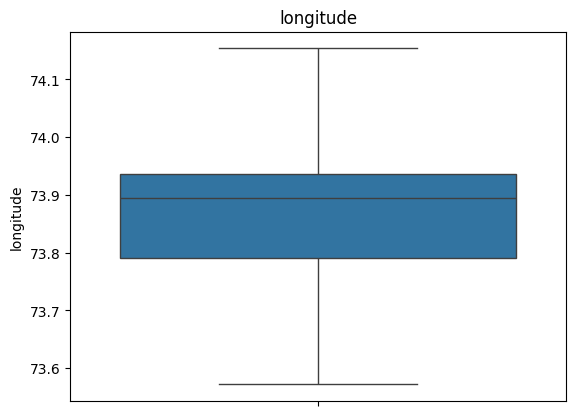

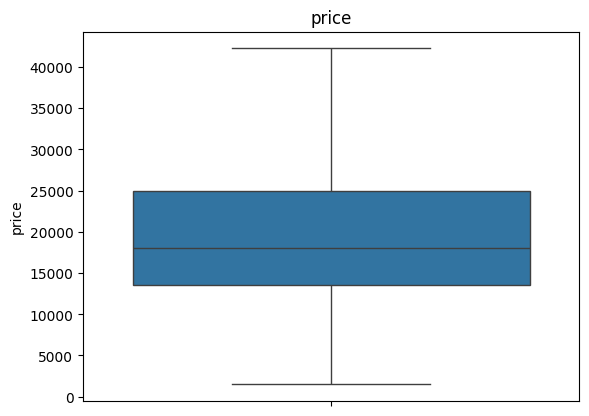

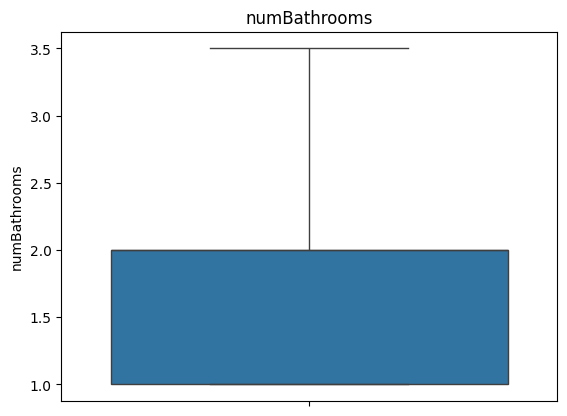

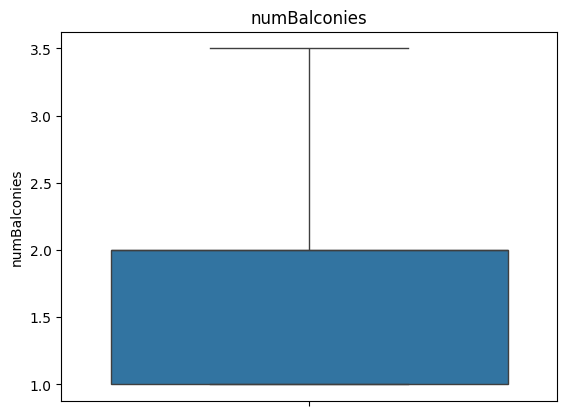

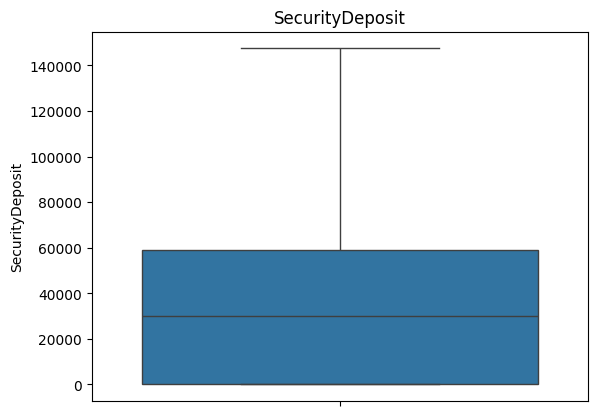

In [43]:
for feature in num_features:
    sns.boxplot(df_capped[feature])
    plt.title(feature)
    plt.show()

In [44]:
df_capped['house_type'].str.strip()

0               2 BHK Apartment
1               1 BHK Apartment
2         1 RK Studio Apartment
3               3 BHK Apartment
4       5 BHK Independent House
                 ...           
3905            1 BHK Apartment
3906            2 BHK Apartment
3907            1 BHK Apartment
3908            2 BHK Apartment
3909            2 BHK Apartment
Name: house_type, Length: 3910, dtype: object

In [45]:
df['house_type'].unique()

array(['2 BHK Apartment ', '1 BHK Apartment ', '1 RK Studio Apartment ',
       '3 BHK Apartment ', '5 BHK Independent House ',
       '1 BHK Independent House ', '5 BHK Apartment ',
       '3 BHK Independent House ', '4 BHK Apartment ', '3 BHK Villa ',
       '4 BHK Villa ', '1 BHK Independent Floor ',
       '2 BHK Independent House ', '4 BHK Independent House ',
       '5 BHK Villa ', '2 BHK Independent Floor ',
       '4 BHK Independent Floor ', '3 BHK Independent Floor ',
       '2 BHK Villa ', '6 BHK Apartment ', '1 BHK Villa ',
       '6 BHK Independent House '], dtype=object)

In [46]:
def clean_house_type(ht):
    ht = ht.strip().title()
    if 'Apartment' in ht:
        return 'Apartment'
    elif 'Independent House' in ht:
        return 'Independent House'
    elif 'Villa' in ht:
        return 'Villa'
    elif 'Independent Floor' in ht:
        return 'Independent Floor'
    else:
        return None


In [47]:
# Apply the function to clean the house_type column
df_capped['house_type_cleaned'] = df_capped['house_type'].apply(clean_house_type)

# Drop rows with None values in the cleaned column
df_capped = df_capped.dropna(subset=['house_type_cleaned'])

# Optionally drop the original column if not needed
df_capped.drop(columns=['house_type'], inplace=True)

In [48]:
df_capped.head()

,house_size,location,latitude,longitude,price,numBathrooms,numBalconies,isNegotiable,verificationDate,description,SecurityDeposit,Status,house_type_cleaned
0,906.0,Lohegaon,18.605820,73.912407,12000.0,2.0,NaN,NaN,Posted 3 years ago,A spacious 2 bhk multistorey apartment is avai...,0.0,Unfurnished,Apartment
1,650.0,Anand Nagar,18.474377,73.820549,11000.0,1.0,NaN,NaN,Posted 2 years ago,It has a built-up area of 650 sqft and is avai...,0.0,Semi-Furnished,Apartment
2,350.0,Wagholi,18.580336,73.980507,4500.0,1.0,NaN,NaN,Posted 2 years ago,This spacious 1 rk independent house is availa...,0.0,Unfurnished,Apartment
3,1500.0,Sangamvadi,18.541786,73.882454,35000.0,2.0,NaN,NaN,Posted 3 years ago,"Furnishings include 1 tv, 1 refrigerator, 1 so...",0.0,Furnished,Apartment
4,1842.5,Wadgaon Sheri,18.560164,73.924927,42250.0,3.5,NaN,NaN,Posted 3 years ago,Itâs a 5 bhk independent house situated in W...,0.0,Unfurnished,Independent House


In [49]:
cat_features.remove('house_type')
cat_features.append('house_type_cleaned')

In [50]:
import matplotlib.pyplot as plt

# List available fonts
from matplotlib import font_manager
available_fonts = sorted([f.name for f in font_manager.fontManager.ttflist])
print(available_fonts)

# Set a font family that includes the missing glyphs
plt.rcParams['font.family'] = 'Arial'

['Agency FB', 'Agency FB', 'Algerian', 'Arial', 'Arial', 'Arial', 'Arial', 'Arial', 'Arial', 'Arial', 'Arial', 'Arial', 'Arial Rounded MT Bold', 'Bahnschrift', 'Baskerville Old Face', 'Bauhaus 93', 'Bell MT', 'Bell MT', 'Bell MT', 'Berlin Sans FB', 'Berlin Sans FB', 'Berlin Sans FB Demi', 'Bernard MT Condensed', 'Blackadder ITC', 'Bodoni MT', 'Bodoni MT', 'Bodoni MT', 'Bodoni MT', 'Bodoni MT', 'Bodoni MT', 'Bodoni MT', 'Bodoni MT', 'Bodoni MT', 'Bodoni MT', 'Bodoni MT', 'Book Antiqua', 'Book Antiqua', 'Book Antiqua', 'Book Antiqua', 'Bookman Old Style', 'Bookman Old Style', 'Bookman Old Style', 'Bookman Old Style', 'Bookshelf Symbol 7', 'Bradley Hand ITC', 'Britannic Bold', 'Broadway', 'Brush Script MT', 'Calibri', 'Calibri', 'Calibri', 'Calibri', 'Calibri', 'Calibri', 'Californian FB', 'Californian FB', 'Californian FB', 'Calisto MT', 'Calisto MT', 'Calisto MT', 'Calisto MT', 'Cambria', 'Cambria', 'Cambria', 'Cambria', 'Candara', 'Candara', 'Candara', 'Candara', 'Candara', 'Candara', 

In [51]:
import warnings

# Suppress specific UserWarnings
warnings.filterwarnings("ignore", category=UserWarning, module="IPython.core.pylabtools")

In [52]:
for feature in cat_features:
    print(f'{feature} and {df_capped[feature].isnull().mean()}')

location and 0.0
isNegotiable and 0.8654731457800512
verificationDate and 0.0
description and 0.119693094629156
Status and 0.0
house_type_cleaned and 0.0


In [53]:
df_capped.drop(columns='isNegotiable',inplace=True)

In [54]:
df_capped.drop(columns='description',inplace=True)

In [55]:
cat_features.remove('isNegotiable')
cat_features.remove('description')

In [56]:
df_capped.shape

(3910, 11)

In [57]:
cat_features

['location', 'verificationDate', 'Status', 'house_type_cleaned']

In [58]:
num_features

['house_size',
 'latitude',
 'longitude',
 'price',
 'numBathrooms',
 'numBalconies',
 'SecurityDeposit']

In [59]:
for feature in num_features:
    print(f'{feature} and {df_capped[feature].isnull().mean()}')

house_size and 0.0
latitude and 0.0
longitude and 0.0
price and 0.0
numBathrooms and 0.004347826086956522
numBalconies and 0.5342710997442455
SecurityDeposit and 0.0


In [60]:
df_capped['numBalconies_nan'] = np.where(df_capped['numBalconies'].isnull(),1,0)
df_capped['numBalconies'] = df_capped['numBalconies'].fillna(0)

In [61]:
df_capped['numBathrooms_nan'] = np.where(df_capped['numBathrooms'].isnull(),1,0)
df_capped['numBathrooms'] = df_capped['numBathrooms'].fillna(df_capped['numBathrooms'].median())

In [62]:
for feature in num_features:
    print(f'{feature} and {df_capped[feature].isnull().mean()}')

house_size and 0.0
latitude and 0.0
longitude and 0.0
price and 0.0
numBathrooms and 0.0
numBalconies and 0.0
SecurityDeposit and 0.0


In [63]:
df_capped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   house_size          3910 non-null   float64
 1   location            3910 non-null   object 
 2   latitude            3910 non-null   float64
 3   longitude           3910 non-null   float64
 4   price               3910 non-null   float64
 5   numBathrooms        3910 non-null   float64
 6   numBalconies        3910 non-null   float64
 7   verificationDate    3910 non-null   object 
 8   SecurityDeposit     3910 non-null   float64
 9   Status              3910 non-null   object 
 10  house_type_cleaned  3910 non-null   object 
 11  numBalconies_nan    3910 non-null   int32  
 12  numBathrooms_nan    3910 non-null   int32  
dtypes: float64(7), int32(2), object(4)
memory usage: 366.7+ KB


In [64]:
df_capped.head()

,house_size,location,latitude,longitude,price,numBathrooms,numBalconies,verificationDate,SecurityDeposit,Status,house_type_cleaned,numBalconies_nan,numBathrooms_nan
0,906.0,Lohegaon,18.605820,73.912407,12000.0,2.0,0.0,Posted 3 years ago,0.0,Unfurnished,Apartment,1,0
1,650.0,Anand Nagar,18.474377,73.820549,11000.0,1.0,0.0,Posted 2 years ago,0.0,Semi-Furnished,Apartment,1,0
2,350.0,Wagholi,18.580336,73.980507,4500.0,1.0,0.0,Posted 2 years ago,0.0,Unfurnished,Apartment,1,0
3,1500.0,Sangamvadi,18.541786,73.882454,35000.0,2.0,0.0,Posted 3 years ago,0.0,Furnished,Apartment,1,0
4,1842.5,Wadgaon Sheri,18.560164,73.924927,42250.0,3.5,0.0,Posted 3 years ago,0.0,Unfurnished,Independent House,1,0


In [65]:
df['verificationDate'].unique()

array(['Posted 3 years ago', 'Posted 2 years ago', 'Posted a month ago',
       'Posted 16 days ago', 'Posted 14 days ago', 'Posted 13 days ago',
       'Posted 11 days ago', 'Posted 4 days ago', 'Posted 9 days ago',
       'Posted 8 hours ago', 'Posted 7 days ago', 'Posted a year ago',
       'Posted 12 days ago', 'Posted 2 months ago', 'Posted 10 days ago',
       'Posted 3 days ago', 'Posted 22 days ago', 'Posted 5 days ago',
       'Posted 4 years ago', 'Posted 21 days ago', 'Posted 23 days ago',
       'Posted 14 hours ago', 'Posted 24 days ago', 'Posted 18 days ago',
       'Posted 8 days ago', 'Posted 25 days ago', 'Posted 17 days ago',
       'Posted 15 days ago', 'Posted 20 days ago', 'Posted 19 days ago',
       'Posted 6 days ago', 'Posted a day ago', 'Posted 2 days ago',
       'Posted 3 hours ago', 'Posted 6 months ago', 'Posted 5 months ago',
       'Posted 13 hours ago', 'Posted 4 months ago',
       'Posted 3 months ago', 'Posted an hour ago', 'Posted 15 hours ago',
   

In [66]:
df_capped['verification_years'] = 0
df_capped['verification_days'] = 0
df_capped['verification_months'] = 0
df_capped['verification_hours'] = 0

In [67]:
import re

In [68]:
year_pattern = r'(\d+) years?'
month_pattern = r'(\d+) months?'
day_pattern = r'(\d+) days?'
hour_pattern = r'(\d+) hours?'

In [69]:
for i, date in enumerate(df_capped['verificationDate']):
    # Extract years
    year_match = re.search(year_pattern, date)
    if year_match:
        years = int(year_match.group(1))
        df_capped.at[i, 'verification_years'] = years
    
    # Extract months
    month_match = re.search(month_pattern, date)
    if month_match:
        months = int(month_match.group(1))
        df_capped.at[i, 'verification_months'] = months
    
    # Extract days
    day_match = re.search(day_pattern, date)
    if day_match:
        days = int(day_match.group(1))
        df_capped.at[i, 'verification_days'] = days
    
    # Extract hours
    hour_match = re.search(hour_pattern, date)
    if hour_match:
        hours = int(hour_match.group(1))
        df_capped.at[i, 'verification_hours'] = hours

In [70]:
df_capped.drop(columns='verificationDate',inplace=True)

In [71]:
df_capped.drop(columns='location',inplace=True)

In [72]:
df_capped.head()

,house_size,latitude,longitude,price,numBathrooms,numBalconies,SecurityDeposit,Status,house_type_cleaned,numBalconies_nan,numBathrooms_nan,verification_years,verification_days,verification_months,verification_hours
0,906.0,18.605820,73.912407,12000.0,2.0,0.0,0.0,Unfurnished,Apartment,1,0,3,0,0,0
1,650.0,18.474377,73.820549,11000.0,1.0,0.0,0.0,Semi-Furnished,Apartment,1,0,2,0,0,0
2,350.0,18.580336,73.980507,4500.0,1.0,0.0,0.0,Unfurnished,Apartment,1,0,2,0,0,0
3,1500.0,18.541786,73.882454,35000.0,2.0,0.0,0.0,Furnished,Apartment,1,0,3,0,0,0
4,1842.5,18.560164,73.924927,42250.0,3.5,0.0,0.0,Unfurnished,Independent House,1,0,3,0,0,0


In [73]:
df_capped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   house_size           3910 non-null   float64
 1   latitude             3910 non-null   float64
 2   longitude            3910 non-null   float64
 3   price                3910 non-null   float64
 4   numBathrooms         3910 non-null   float64
 5   numBalconies         3910 non-null   float64
 6   SecurityDeposit      3910 non-null   float64
 7   Status               3910 non-null   object 
 8   house_type_cleaned   3910 non-null   object 
 9   numBalconies_nan     3910 non-null   int32  
 10  numBathrooms_nan     3910 non-null   int32  
 11  verification_years   3910 non-null   int64  
 12  verification_days    3910 non-null   int64  
 13  verification_months  3910 non-null   int64  
 14  verification_hours   3910 non-null   int64  
dtypes: float64(7), int32(2), int64(4), obj

In [74]:
df_capped['Status'].unique()

array(['Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

In [75]:
df_capped['house_type_cleaned'].unique()

array(['Apartment', 'Independent House', 'Villa', 'Independent Floor'],
      dtype=object)

In [76]:
df_capped = pd.get_dummies(df_capped, columns=['Status', 'house_type_cleaned'],dtype='int')

In [77]:
df_capped

,house_size,latitude,longitude,price,numBathrooms,numBalconies,SecurityDeposit,numBalconies_nan,numBathrooms_nan,verification_years,verification_days,verification_months,verification_hours,Status_Furnished,Status_Semi-Furnished,Status_Unfurnished,house_type_cleaned_Apartment,house_type_cleaned_Independent Floor,house_type_cleaned_Independent House,house_type_cleaned_Villa
0,906.0,18.605820,73.912407,12000.0,2.0,0.0,0.0,1,0,3,0,0,0,0,0,1,1,0,0,0
1,650.0,18.474377,73.820549,11000.0,1.0,0.0,0.0,1,0,2,0,0,0,0,1,0,1,0,0,0
2,350.0,18.580336,73.980507,4500.0,1.0,0.0,0.0,1,0,2,0,0,0,0,0,1,1,0,0,0
3,1500.0,18.541786,73.882454,35000.0,2.0,0.0,0.0,1,0,3,0,0,0,1,0,0,1,0,0,0
4,1842.5,18.560164,73.924927,42250.0,3.5,0.0,0.0,1,0,3,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,655.0,18.603699,73.761238,12500.0,1.0,0.0,36000.0,1,0,3,0,0,0,0,0,1,1,0,0,0
3906,920.0,18.594870,73.798187,16000.0,2.0,0.0,50000.0,1,0,3,0,0,0,0,0,1,1,0,0,0
3907,650.0,18.595701,73.797890,16000.0,1.0,1.0,35000.0,0,0,3,0,0,0,1,0,0,1,0,0,0
3908,1200.0,18.592476,73.798538,20000.0,2.0,0.0,60000.0,1,0,3,0,0,0,1,0,0,1,0,0,0


In [78]:
df_capped.corr()

,house_size,latitude,longitude,price,numBathrooms,numBalconies,SecurityDeposit,numBalconies_nan,numBathrooms_nan,verification_years,verification_days,verification_months,verification_hours,Status_Furnished,Status_Semi-Furnished,Status_Unfurnished,house_type_cleaned_Apartment,house_type_cleaned_Independent Floor,house_type_cleaned_Independent House,house_type_cleaned_Villa
house_size,1.000000,-0.091983,0.050509,0.722594,0.825186,0.213749,0.403440,-0.104314,-0.035395,-0.061698,0.055466,-0.035554,-0.014358,0.091118,0.057355,-0.124992,-0.110772,-0.044063,0.004302,0.219046
latitude,-0.091983,1.000000,-0.134013,-0.143671,-0.066951,-0.028750,-0.162985,0.112274,-0.001552,-0.070473,0.137582,-0.122396,-0.008018,-0.003112,0.013485,-0.010961,0.066979,-0.010471,0.028887,-0.133836
longitude,0.050509,-0.134013,1.000000,-0.075766,0.072866,0.180758,0.063028,-0.147972,-0.052708,-0.280393,0.114852,-0.044092,-0.006423,-0.123523,0.041641,0.051704,-0.003495,0.005029,-0.029297,0.032905
price,0.722594,-0.143671,-0.075766,1.000000,0.643637,0.013690,0.400836,0.040002,-0.034226,-0.162828,0.118868,0.017519,0.049802,0.271204,0.013247,-0.216744,-0.100774,-0.084045,-0.002114,0.244144
numBathrooms,0.825186,-0.066951,0.072866,0.643637,1.000000,0.204427,0.344330,-0.087193,0.007169,-0.062229,0.082897,-0.050425,-0.019251,0.054605,0.070827,-0.110855,-0.068864,-0.076653,0.008617,0.172824
numBalconies,0.213749,-0.028750,0.180758,0.013690,0.204427,1.000000,0.500649,-0.880608,-0.045623,-0.120383,-0.105104,0.060162,-0.042252,-0.070629,-0.030585,0.083205,0.031068,-0.039232,-0.073056,0.060770
SecurityDeposit,0.403440,-0.162985,0.063028,0.400836,0.344330,0.500649,1.000000,-0.527859,-0.057937,-0.147719,-0.133546,0.173254,-0.067202,0.030114,-0.036842,0.013715,-0.025767,-0.059306,-0.097403,0.199454
numBalconies_nan,-0.104314,0.112274,-0.147972,0.040002,-0.087193,-0.880608,-0.527859,1.000000,0.046112,0.123689,0.152585,-0.085159,0.055755,0.088345,0.068005,-0.133412,-0.007886,0.033965,0.075239,-0.097264
numBathrooms_nan,-0.035395,-0.001552,-0.052708,-0.034226,0.007169,-0.045623,-0.057937,0.046112,1.000000,0.072597,-0.028240,-0.006587,-0.005405,-0.008665,0.017967,-0.011210,-0.063686,0.053289,0.039752,0.017236
verification_years,-0.061698,-0.070473,-0.280393,-0.162828,-0.062229,-0.120383,-0.147719,0.123689,0.072597,1.000000,-0.310975,-0.270363,-0.059522,0.042331,0.014128,-0.045724,-0.022521,0.013386,0.078383,-0.058199


<Axes: >

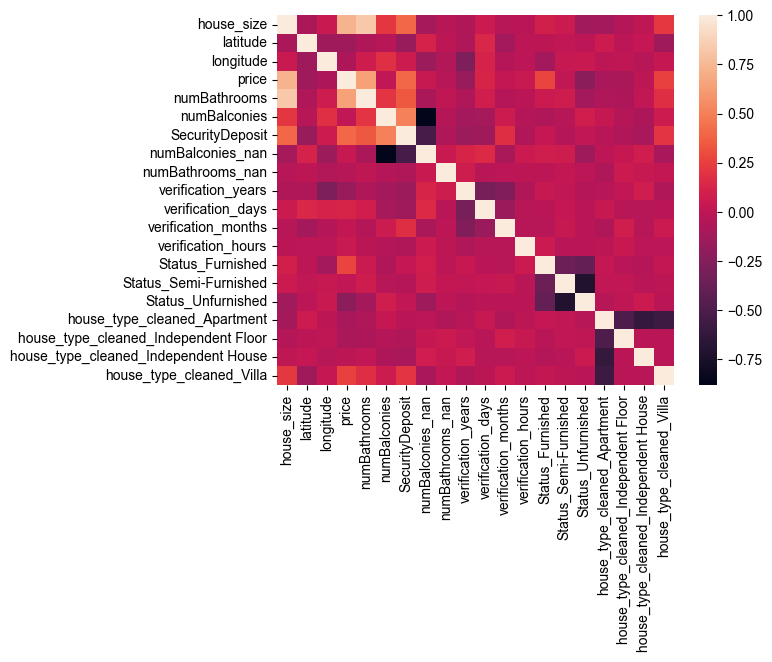

In [80]:
sns.heatmap(df_capped.corr())

In [98]:
X = df_capped.drop(columns='price')
y = df_capped['price']

In [99]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [101]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_capped.drop(columns='price'))

MinMaxScaler()

In [102]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [103]:
X_train

array([[0.35391433, 0.32662143, 0.48937126, ..., 0.        , 0.        ,
        0.        ],
       [0.4732644 , 0.53721608, 0.70815077, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.08863484, 0.56839319, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.20679468, 1.        , 0.54998885, ..., 1.        , 0.        ,
        0.        ],
       [0.28537666, 0.6052432 , 0.5517204 , ..., 0.        , 0.        ,
        0.        ],
       [0.71905465, 0.32251378, 0.58955228, ..., 0.        , 0.        ,
        0.        ]])

In [90]:
X.to_csv('features.csv', index=False)
y.to_csv('target.csv', index=False)

In [104]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [105]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005,random_state=2))
feature_sel_model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=2))

In [106]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [107]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [108]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [109]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [110]:
print(r2_score(y_pred,y_test))
print(mean_squared_error(y_pred,y_test))
print(mean_absolute_error(y_pred,y_test))


0.5061144606572667
29350576.260631215
4111.370735393286


In [111]:
from lazypredict.Supervised import LazyRegressor

In [112]:
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

# Fitting and predicting
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
# Display the results
print(models)

 98%|█████████▊| 41/42 [00:29<00:00,  1.75it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001434 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 883
[LightGBM] [Info] Number of data points in the train set: 3128, number of used features: 18
[LightGBM] [Info] Start training from score 20263.016624


100%|██████████| 42/42 [00:29<00:00,  1.44it/s]

                               Adjusted R-Squared  R-Squared      RMSE  \
Model                                                                    
RandomForestRegressor                        0.87       0.88   3237.19   
HistGradientBoostingRegressor                0.87       0.87   3254.46   
LGBMRegressor                                0.87       0.87   3304.08   
XGBRegressor                                 0.87       0.87   3322.94   
BaggingRegressor                             0.85       0.86   3494.87   
ExtraTreesRegressor                          0.84       0.85   3575.95   
GradientBoostingRegressor                    0.84       0.85   3581.94   
KNeighborsRegressor                          0.75       0.75   4552.35   
DecisionTreeRegressor                        0.69       0.70   5022.83   
ExtraTreeRegressor                           0.69       0.70   5063.80   
TransformedTargetRegressor                   0.64       0.65   5409.66   
LinearRegression                      

In [113]:
# Saving results to CSV
models.to_csv('lazy_regressor_models.csv')

In [114]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [115]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred_2 = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred_2)
mae = mean_absolute_error(y_test, y_pred_2)
mse = mean_squared_error(y_test, y_pred_2)
rmse = mean_squared_error(y_test, y_pred_2, squared=False)

print(f"R^2: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

R^2: 0.88
Mean Absolute Error: 2109.70
Mean Squared Error: 10484062.96
Root Mean Squared Error: 3237.91


In [117]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X, y, cv=10, scoring='r2')
print(f"Cross-Validation R^2 Scores: {cv_scores}")
print(f"Mean Cross-Validation R^2 Score: {cv_scores.mean():.2f}")

# Save the model for future use
joblib.dump(model, 'random_forest_regressor.pkl')

Cross-Validation R^2 Scores: [0.73177789 0.70763546 0.78939841 0.82130424 0.67787077 0.71412906
 0.86134959 0.84306863 0.77374102 0.52581028]
Mean Cross-Validation R^2 Score: 0.74


['random_forest_regressor.pkl']

In [118]:
df_capped.columns

Index(['house_size', 'latitude', 'longitude', 'price', 'numBathrooms',
       'numBalconies', 'SecurityDeposit', 'numBalconies_nan',
       'numBathrooms_nan', 'verification_years', 'verification_days',
       'verification_months', 'verification_hours', 'Status_Furnished',
       'Status_Semi-Furnished', 'Status_Unfurnished',
       'house_type_cleaned_Apartment', 'house_type_cleaned_Independent Floor',
       'house_type_cleaned_Independent House', 'house_type_cleaned_Villa'],
      dtype='object')